# Financial Analysis

This notebook shows visualisatinos of profit over time, and a profit by region.

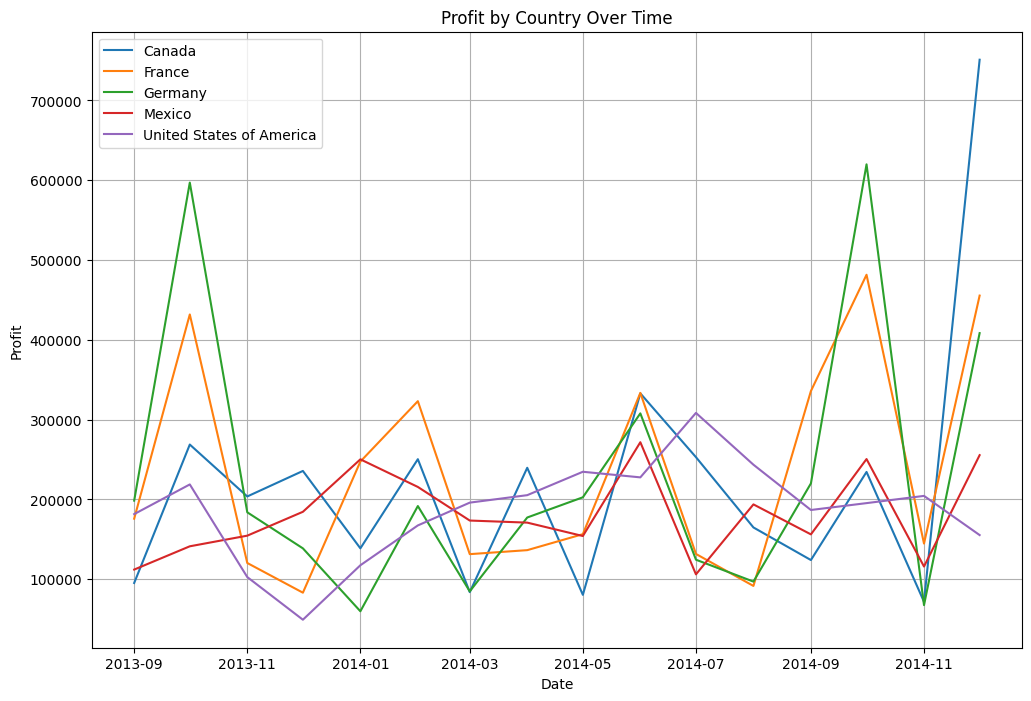

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'Financial Sample.xlsx'  # Ensure this file is in the root directory when running the code
financial_data = pd.read_excel(file_path)

# Convert 'Date' column to datetime format
financial_data['Date'] = pd.to_datetime(financial_data['Date'])

# Group by Country and Date, then sum the Profit
profit_by_country = financial_data.groupby(['Country', 'Date'])['Profit'].sum().unstack('Country')

# Plotting the data
plt.figure(figsize=(12, 8))
for country in profit_by_country.columns:
    plt.plot(profit_by_country.index, profit_by_country[country], label=country)

plt.title('Profit by Country Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()

# Comments

Boring

In [4]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import time

# Load the data from the Excel file
file_path = 'Financial Sample.xlsx'
financial_data = pd.read_excel(file_path, engine='openpyxl')

# Aggregate gross sales data by country and product
gross_sales_by_country_product = financial_data.groupby(['Country', 'Product'])['Gross Sales'].sum().reset_index()

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to get latitude and longitude
def get_lat_lon(country):
    try:
        location = geolocator.geocode(country)
        return location.latitude, location.longitude
    except:
        return None, None

# Apply the function to get coordinates for each country
gross_sales_by_country_product[['Lat', 'Lon']] = gross_sales_by_country_product['Country'].apply(lambda x: pd.Series(get_lat_lon(x)))

# Drop rows where coordinates could not be found
gross_sales_by_country_product.dropna(subset=['Lat', 'Lon'], inplace=True)

# Create a map centered around the average coordinates
m = folium.Map(location=[20, 0], zoom_start=2)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Add points to the map
for idx, row in gross_sales_by_country_product.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Lon']],
        popup=f"{row['Country']} - {row['Product']}: ${row['Gross Sales']:.2f}",
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('gross_sales_by_country_product_map.html')

# Display the map
m


# Comments

Amazing!!